In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
df=pd.read_csv('/Users/apple/Desktop/Data science/UpGrad ML/MLR/Housing.csv')
df1=df
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
def cat(x):
    if x=='yes':
        return(1)
    else:
        return(0)

In [16]:
df1['mainroad']=df1['mainroad'].apply(cat)
df1['guestroom']=df1['guestroom'].apply(cat)
df1['basement']=df1['basement'].apply(cat)
df1['hotwaterheating']=df1['hotwaterheating'].apply(cat)
df1['airconditioning']=df1['airconditioning'].apply(cat)
df1['prefarea']=df1['prefarea'].apply(cat)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [19]:
mms=MinMaxScaler()
df1[['price','area','bedrooms','bathrooms','stories','parking']]=mms.fit_transform(df1[['price','area','bedrooms','bathrooms','stories','parking']])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,furnished


In [21]:
dummies=pd.get_dummies(df1['furnishingstatus'])
dummies.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [23]:
df_merge=pd.concat([df1,dummies],axis='columns')
df_merge.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,furnished,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,furnished,1,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,semi-furnished,0,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,furnished,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,furnished,1,0,0


In [25]:
df_merge_final=df_merge.drop(['furnishingstatus','furnished'],axis='columns')
df_merge_final.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x= df_merge_final.drop(['price'],axis='columns')
y=df_merge_final['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [29]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
22,0.439863,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,0,0
41,0.323711,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0,0
91,0.350515,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,0,0
118,0.327835,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0,0
472,0.136082,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1,0


In [30]:
y_train.head()

22     0.596970
41     0.527273
91     0.404242
118    0.363636
472    0.109091
Name: price, dtype: float64

In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)
rfe=RFE(lr,10)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [37]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [40]:

col=x_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [43]:
x_train_rfe=x_train[col]
x_train_rfe.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
22,0.439863,0.4,0.000000,0.000000,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.323711,0.4,0.333333,1.000000,1.0,0.0,0.0,1.0,0.000000,1.0
91,0.350515,0.2,0.000000,0.000000,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.327835,0.4,0.000000,0.000000,1.0,0.0,0.0,1.0,0.000000,1.0
472,0.136082,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,1.000000,0.0


In [53]:
x_train_final=sm.add_constant(x_train_rfe)
model=sm.OLS(y_train,x_train_final)
model_lr=model.fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     84.45
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           1.80e-94
Time:                        13:47:09   Log-Likelihood:                 414.89
No. Observations:                 436   AIC:                            -807.8
Df Residuals:                     425   BIC:                            -762.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003      0.018      0.016      0.987      -0.035       0.035
area                0.3087      0.035      8.759      0.000       0.239       0.378
bedrooms            0.0569      0.036      1.578      0.115      -0.014       0.128
bathrooms           0.3034      0.031      9.834      0.000       0.243       0.364
stories             0.0950      0.018      5.280      0.000       0.060       0.130
mainroad            0.0544      0.014      3.826      0.000       0.026       0.082
guestroom           0.0449      0.012      3.619      0.000       0.021       0.069
hotwaterheating     0.0794      0.020      3.907      0.000       0.039       0.119
airconditioning     0.0776      0.011      7.216      0.000       0.056       0.099
parking             0.0660      0.017      3.829      0.000       0.032       0.100
prefarea            0.0575      0.011      5.134      0.000       0.035       0.080
==============================================================================
Omnibus:                       76.714   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.705
Skew:                           0.841   Prob(JB):                     1.07e-46
Kurtosis:                       5.971   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
x_train_final1=x_train_final.drop('bedrooms',axis='columns')
model1=sm.OLS(y_train,x_train_final1)
model1_lr=model1.fit()
model1_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     93.23
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           6.18e-95
Time:                        13:51:31   Log-Likelihood:                 413.62
No. Observations:                 436   AIC:                            -807.2
Df Residuals:                     426   BIC:                            -766.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0188      0.013      1.417      0.157      -0.007       0.045
area                0.3116      0.035      8.840      0.000       0.242       0.381
bathrooms           0.3156      0.030     10.550      0.000       0.257       0.374
stories             0.1046      0.017      6.169      0.000       0.071       0.138
mainroad            0.0525      0.014      3.696      0.000       0.025       0.080
guestroom           0.0456      0.012      3.672      0.000       0.021       0.070
hotwaterheating     0.0802      0.020      3.943      0.000       0.040       0.120
airconditioning     0.0772      0.011      7.168      0.000       0.056       0.098
parking             0.0685      0.017      3.987      0.000       0.035       0.102
prefarea            0.0577      0.011      5.142      0.000       0.036       0.080
==============================================================================
Omnibus:                       80.750   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.981
Skew:                           0.875   Prob(JB):                     1.89e-50
Kurtosis:                       6.089   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
y_train_pred=model1_lr.predict(x_train_final1)
res=y_train-y_train_pred

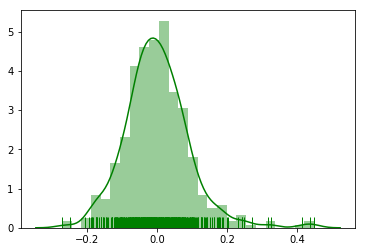

In [59]:
sns.distplot(res,rug=True,color='g')